<a href="https://colab.research.google.com/github/capradhaan/Customer_Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_file = "Customer_Churn_CSV_Files.zip"
extract_folder = "churn_data"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

os.listdir(extract_folder)

['new_customers.csv', 'customer_churn.csv', 'data_dictionary.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
churn_df = pd.read_csv("churn_data/customer_churn.csv")
new_customers = pd.read_csv("churn_data/new_customers.csv")

churn_df.head()

,customer_id,tenure,monthly_charges,total_charges,contract_type,payment_method,churn
0,1001,1,70,70,Month-to-month,Electronic check,1
1,1002,2,75,150,Month-to-month,Electronic check,1
2,1003,3,65,195,Month-to-month,Mailed check,1
3,1004,5,80,400,Month-to-month,Electronic check,1
4,1005,8,85,680,One year,Credit card,0


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      20 non-null     int64 
 1   tenure           20 non-null     int64 
 2   monthly_charges  20 non-null     int64 
 3   total_charges    20 non-null     int64 
 4   contract_type    20 non-null     object
 5   payment_method   20 non-null     object
 6   churn            20 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.2+ KB


In [ ]:
churn_df['churn'].value_counts()

,count
churn,
0,13
1,7


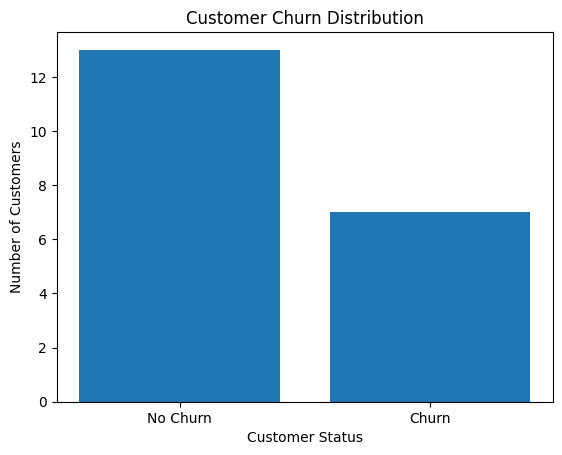

In [ ]:
import matplotlib.pyplot as plt

churn_counts = churn_df['churn'].value_counts()

plt.figure()
plt.bar(churn_counts.index, churn_counts.values)
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Distribution")
plt.show()

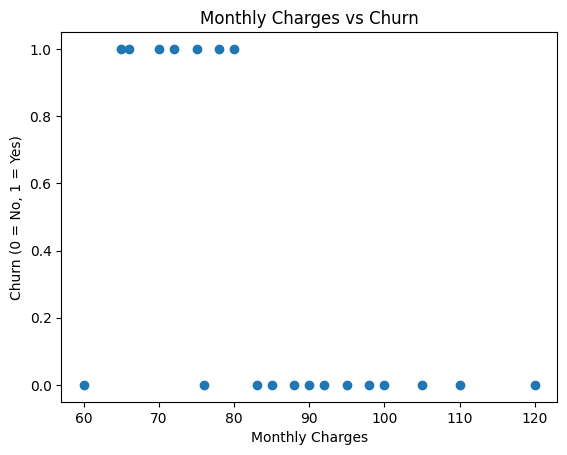

In [ ]:
plt.figure()
plt.scatter(churn_df['monthly_charges'], churn_df['churn'])
plt.xlabel("Monthly Charges")
plt.ylabel("Churn (0 = No, 1 = Yes)")
plt.title("Monthly Charges vs Churn")
plt.show()


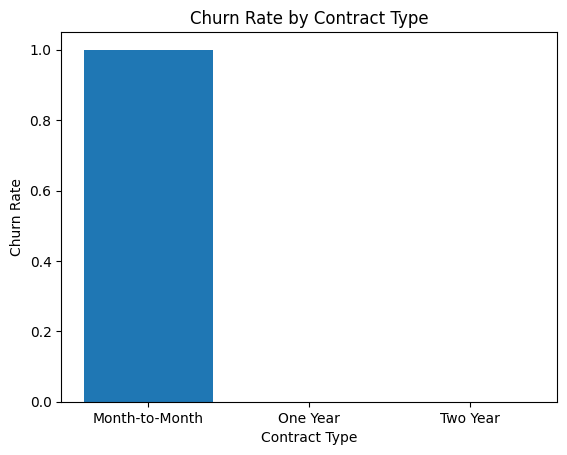

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

contract_churn = churn_df.groupby('contract_type')['churn'].mean()

plt.figure()
plt.bar(contract_churn.index, contract_churn.values)
plt.xticks(contract_churn.index, ['Month-to-Month', 'One Year', 'Two Year'])
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.show()

/tmp/ipython-input-489468492.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = churn_df.groupby('tenure_group')['churn'].mean()


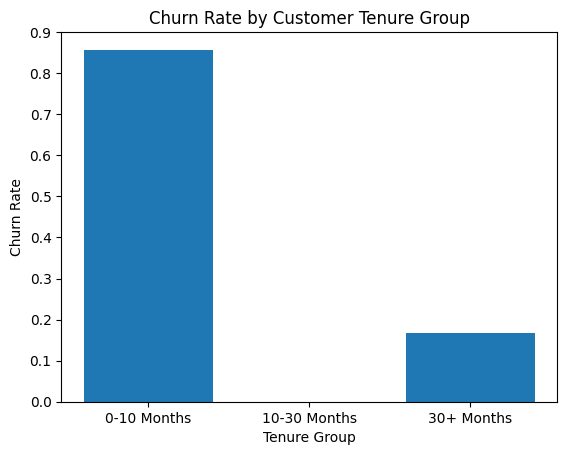

In [ ]:
churn_df['tenure_group'] = pd.cut(
    churn_df['tenure'],
    bins=[0,10,30,60],
    labels=['0-10 Months', '10-30 Months', '30+ Months']
)

tenure_churn = churn_df.groupby('tenure_group')['churn'].mean()

plt.figure()
plt.bar(tenure_churn.index, tenure_churn.values)
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Customer Tenure Group")
plt.show()
